# 6.4 Machine Learning

### 1. Import libraries
### 2. Import data
### 3. Clean data
### 4. Create columns
#### length of trip
#### Extract start date and time
#### Extract end date and time
### 5. Extreme values
### 6. Scatterplots and tests
#### Create ride test
### 7. Use IQR method to look for outliers
### 8. Cleaning unneeded columns from cb_df

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that graphs are displayed within the notebook without the need to "call" them.

%matplotlib inline

### Import data

In [1]:
# Path

path = 'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6'

In [4]:
# Import citbike_clean

cb_df = pd.read_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_clean_2.csv'))

In [5]:
cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords
0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,9/9/2013 18:35,993,523,W 38 St & 8 Ave,...,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787"
1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,9/12/2013 18:48,581,257,Lispenard St & Broadway,...,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186"
2,2,46clGB,17942,Wed,19,9/18/2013 19:44,9/18/2013 19:50,361,479,9 Ave & W 45 St,...,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254"
3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,9/28/2013 12:03,561,527,E 33 St & 1 Ave,...,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014"
4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,9/7/2013 18:46,2296,521,8 Ave & W 31 St,...,-73.994811,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,NaN,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314"


### Clean data

In [6]:
cb_df.describe()

,Unnamed: 0,bike_id,start_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,birth_year,gender
count,49972.000000,49972.00000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,42993.000000,49972.000000
mean,25001.073301,17615.30313,14.145922,838.916873,443.306792,40.734170,-73.991106,442.526035,40.733860,-73.991348,1975.674459,1.073581
std,14431.811916,1675.10716,4.860677,573.687019,356.582817,0.019911,0.012553,355.701958,0.019885,0.012569,10.938735,0.589551
min,0.000000,14556.00000,0.000000,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,1924.000000,0.000000
25%,12501.750000,16188.00000,10.000000,417.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,1968.000000,1.000000
50%,25002.500000,17584.00000,15.000000,672.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.990985,1978.000000,1.000000
75%,37497.250000,19014.00000,18.000000,1112.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1984.000000,1.000000
max,49999.000000,20642.00000,23.000000,2697.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,1997.000000,2.000000


In [7]:
# Check for missing values

cb_df.isnull().sum()

Unnamed: 0                    0
trip_id                       0
bike_id                       0
day_of_week                   0
start_hour                    0
start_time                    0
end_time                      0
trip_duration                 0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
subscriber                    0
birth_year                 6979
gender                        0
start_station_coords          0
end_station_coords            0
dtype: int64

In [8]:
# Remove missing values

cb_df['birth_year'].fillna(cb_df['birth_year'].median(), inplace=True)

In [9]:
cb_df.isnull().sum()

Unnamed: 0                 0
trip_id                    0
bike_id                    0
day_of_week                0
start_hour                 0
start_time                 0
end_time                   0
trip_duration              0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
subscriber                 0
birth_year                 0
gender                     0
start_station_coords       0
end_station_coords         0
dtype: int64

In [10]:
cb_df.describe()

,Unnamed: 0,bike_id,start_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,birth_year,gender
count,49972.000000,49972.00000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000,49972.000000
mean,25001.073301,17615.30313,14.145922,838.916873,443.306792,40.734170,-73.991106,442.526035,40.733860,-73.991348,1975.999240,1.073581
std,14431.811916,1675.10716,4.860677,573.687019,356.582817,0.019911,0.012553,355.701958,0.019885,0.012569,10.178138,0.589551
min,0.000000,14556.00000,0.000000,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,1924.000000,0.000000
25%,12501.750000,16188.00000,10.000000,417.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,1970.000000,1.000000
50%,25002.500000,17584.00000,15.000000,672.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.990985,1978.000000,1.000000
75%,37497.250000,19014.00000,18.000000,1112.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1983.000000,1.000000
max,49999.000000,20642.00000,23.000000,2697.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,1997.000000,2.000000


### Create columns

#### Length of trip

In [11]:
# Define trip_length

def trip_length(row):

  if row['trip_duration'] < 600:
    return 'Under 10 min'
  elif (row['trip_duration'] >= 600) and (row['trip_duration'] <= 1200):
    return '10-20 min'
  elif row['trip_duration'] > 1200:
    return 'Over 20 min'
  else: return 'Not enough data'

In [12]:
cb_df['trip_length'] = cb_df.apply(trip_length, axis=1)

In [13]:
cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length
0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,9/9/2013 18:35,993,523,W 38 St & 8 Ave,...,334,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min
1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,9/12/2013 18:48,581,257,Lispenard St & Broadway,...,236,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min
2,2,46clGB,17942,Wed,19,9/18/2013 19:44,9/18/2013 19:50,361,479,9 Ave & W 45 St,...,513,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min
3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,9/28/2013 12:03,561,527,E 33 St & 1 Ave,...,441,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min
4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,9/7/2013 18:46,2296,521,8 Ave & W 31 St,...,476,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,1978.0,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314",Over 20 min


#### Extract start date and time

In [14]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               49972 non-null  int64  
 1   trip_id                  49972 non-null  object 
 2   bike_id                  49972 non-null  int64  
 3   day_of_week              49972 non-null  object 
 4   start_hour               49972 non-null  int64  
 5   start_time               49972 non-null  object 
 6   end_time                 49972 non-null  object 
 7   trip_duration            49972 non-null  int64  
 8   start_station_id         49972 non-null  int64  
 9   start_station_name       49972 non-null  object 
 10  start_station_latitude   49972 non-null  float64
 11  start_station_longitude  49972 non-null  float64
 12  end_station_id           49972 non-null  int64  
 13  end_station_name         49972 non-null  object 
 14  end_station_latitude  

In [15]:
# Define data types for start_time

cb_df['start_time'] = cb_df['start_time'].astype('datetime64')

In [16]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               49972 non-null  int64         
 1   trip_id                  49972 non-null  object        
 2   bike_id                  49972 non-null  int64         
 3   day_of_week              49972 non-null  object        
 4   start_hour               49972 non-null  int64         
 5   start_time               49972 non-null  datetime64[ns]
 6   end_time                 49972 non-null  object        
 7   trip_duration            49972 non-null  int64         
 8   start_station_id         49972 non-null  int64         
 9   start_station_name       49972 non-null  object        
 10  start_station_latitude   49972 non-null  float64       
 11  start_station_longitude  49972 non-null  float64       
 12  end_station_id           49972 n

In [17]:
# Create a date and time column

cb_df['start_date'] = cb_df['start_time'].dt.strftime('%m-%d-%y') 
cb_df['start_time'] = cb_df['start_time'].dt.strftime('%H:%M')

In [18]:
cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date
0,0,LnQzQk,16013,Mon,18,18:18,9/9/2013 18:35,993,523,W 38 St & 8 Ave,...,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min,09-09-13
1,1,IL9boN,15230,Thu,18,18:38,9/12/2013 18:48,581,257,Lispenard St & Broadway,...,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min,09-12-13
2,2,46clGB,17942,Wed,19,19:44,9/18/2013 19:50,361,479,9 Ave & W 45 St,...,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min,09-18-13
3,3,v7vdFt,19683,Sat,11,11:54,9/28/2013 12:03,561,527,E 33 St & 1 Ave,...,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min,09-28-13
4,4,VGBsb5,18024,Sat,18,18:08,9/7/2013 18:46,2296,521,8 Ave & W 31 St,...,E 31 St & 3 Ave,40.743943,-73.979661,Non-Subscriber,1978.0,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314",Over 20 min,09-07-13


#### Extract end date and time

In [19]:
# Define data types for end_time

cb_df['end_time'] = cb_df['end_time'].astype('datetime64')

In [20]:
# Create a date and time column

cb_df['end_date'] = cb_df['end_time'].dt.strftime('%m-%d-%y') 
cb_df['end_time'] = cb_df['end_time'].dt.strftime('%H:%M')

In [21]:
cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date,end_date
0,0,LnQzQk,16013,Mon,18,18:18,18:35,993,523,W 38 St & 8 Ave,...,40.742388,-73.997262,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min,09-09-13,09-09-13
1,1,IL9boN,15230,Thu,18,18:38,18:48,581,257,Lispenard St & Broadway,...,40.728419,-73.987140,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min,09-12-13,09-12-13
2,2,46clGB,17942,Wed,19,19:44,19:50,361,479,9 Ave & W 45 St,...,40.768254,-73.988639,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min,09-18-13,09-18-13
3,3,v7vdFt,19683,Sat,11,11:54,12:03,561,527,E 33 St & 1 Ave,...,40.756014,-73.967416,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min,09-28-13,09-28-13
4,4,VGBsb5,18024,Sat,18,18:08,18:46,2296,521,8 Ave & W 31 St,...,40.743943,-73.979661,Non-Subscriber,1978.0,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314",Over 20 min,09-07-13,09-07-13


In [24]:
# Define data types for end_time

cb_df['start_date'] = cb_df['start_date'].astype('datetime64')

In [25]:
# Define data types for end_time

cb_df['end_date'] = cb_df['end_date'].astype('datetime64')

In [26]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               49972 non-null  int64         
 1   trip_id                  49972 non-null  object        
 2   bike_id                  49972 non-null  int64         
 3   day_of_week              49972 non-null  object        
 4   start_hour               49972 non-null  int64         
 5   start_time               49972 non-null  object        
 6   end_time                 49972 non-null  object        
 7   trip_duration            49972 non-null  int64         
 8   start_station_id         49972 non-null  int64         
 9   start_station_name       49972 non-null  object        
 10  start_station_latitude   49972 non-null  float64       
 11  start_station_longitude  49972 non-null  float64       
 12  end_station_id           49972 n

### Extreme values

C:\Users\micky\AppData\Local\Temp\ipykernel_15720\1657268338.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cb_df['trip_duration'], bins=60)


<Axes: xlabel='trip_duration', ylabel='Density'>

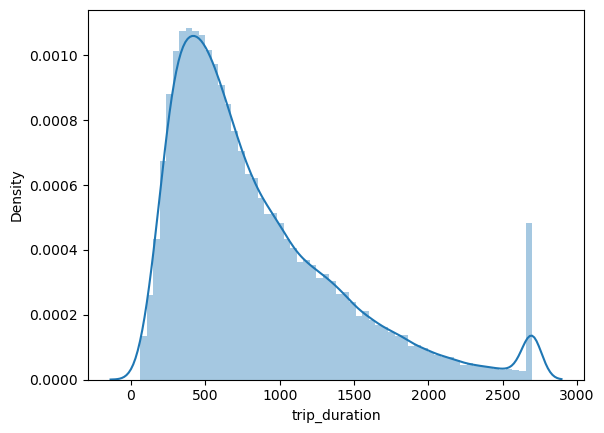

In [22]:
# Show extreme values

sns.distplot(cb_df['trip_duration'], bins=60)

#### Check time to date

In [29]:
# Amount of rides taken on per hour each day

hour = cb_df.groupby(['start_hour', cb_df['start_date'].dt.date])['start_date'].count()

In [30]:
hour

start_hour  start_date
0           2013-09-01    21
            2013-09-02    26
            2013-09-03     7
            2013-09-04    11
            2013-09-05    19
                          ..
23          2013-09-26    42
            2013-09-27    47
            2013-09-28    55
            2013-09-29    22
            2013-09-30    19
Name: start_date, Length: 713, dtype: int64

In [31]:
# Average rides per hour

rides_per_hour = hour.groupby('start_hour').mean().reset_index()

In [32]:
rides_per_hour

,start_hour,start_date
0,0,17.400000
1,1,11.000000
2,2,6.466667
3,3,4.615385
4,4,3.296296
5,5,6.933333
6,6,30.366667
7,7,67.900000
8,8,109.433333
9,9,93.700000


In [33]:
day_count = cb_df.groupby('day_of_week')['start_date'].count().reset_index()

In [34]:
day_count

,day_of_week,start_date
0,Fri,7307
1,Mon,7712
2,Sat,6506
3,Sun,7315
4,Thu,6847
5,Tue,7061
6,Wed,7224


In [35]:
hour_day_count = cb_df.groupby(['day_of_week','start_hour'])['start_date'].count()

In [36]:
hour_day_count

day_of_week  start_hour
Fri          0              56
             1              38
             2              27
             3              13
             4              10
                          ... 
Wed          19            523
             20            333
             21            228
             22            211
             23            125
Name: start_date, Length: 168, dtype: int64

### Scatterplots and tests

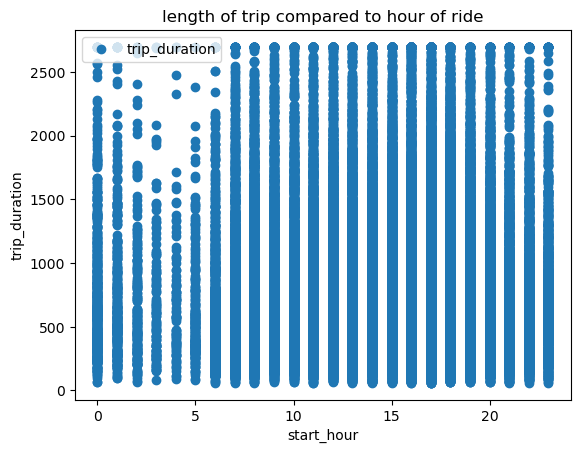

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

cb_df.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip compared to hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

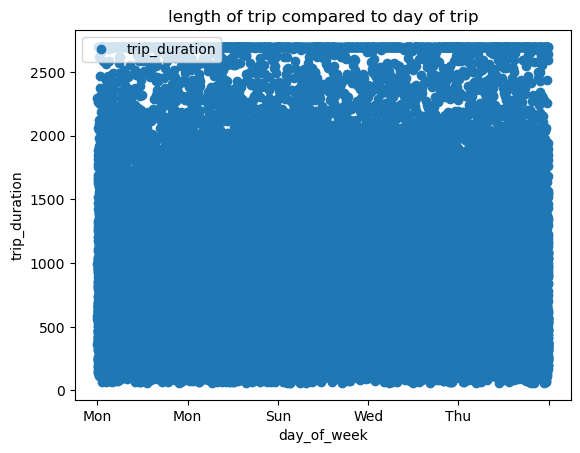

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

cb_df.plot(x = 'day_of_week', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip compared to day of trip')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration')  
plt.show()

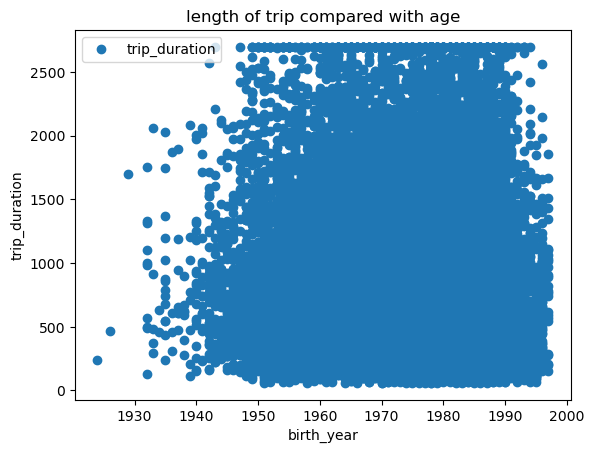

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

cb_df.plot(x = 'birth_year', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip compared with age')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

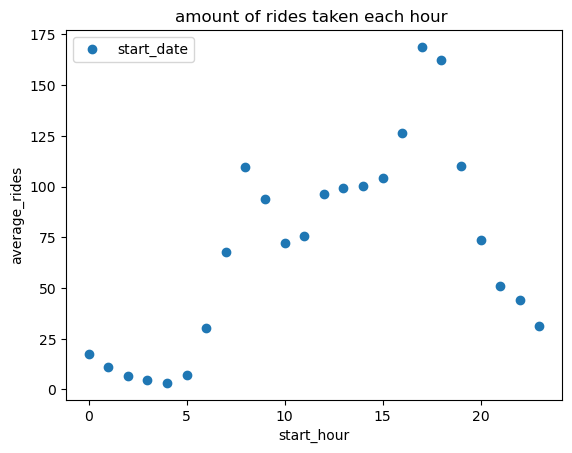

In [41]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

rides_per_hour.plot(x = 'start_hour', y='start_date',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken each hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides')  
plt.show()

#### Create ride count

In [42]:
ride_count = pd.get_dummies(cb_df, columns=['day_of_week', 'start_hour'], drop_first=True)

In [43]:
ride_count

,Unnamed: 0,trip_id,bike_id,start_time,end_time,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,LnQzQk,16013,18:18,18:35,993,523,W 38 St & 8 Ave,40.754666,-73.991382,...,0,0,0,0,1,0,0,0,0,0
1,1,IL9boN,15230,18:38,18:48,581,257,Lispenard St & Broadway,40.719392,-74.002472,...,0,0,0,0,1,0,0,0,0,0
2,2,46clGB,17942,19:44,19:50,361,479,9 Ave & W 45 St,40.760193,-73.991255,...,0,0,0,0,0,1,0,0,0,0
3,3,v7vdFt,19683,11:54,12:03,561,527,E 33 St & 1 Ave,40.743156,-73.974347,...,0,0,0,0,0,0,0,0,0,0
4,4,VGBsb5,18024,18:08,18:46,2296,521,8 Ave & W 31 St,40.750450,-73.994811,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,49995,Fb2bmC,17988,18:39,20:08,2697,479,9 Ave & W 45 St,40.760193,-73.991255,...,0,0,0,0,1,0,0,0,0,0
49968,49996,XGB7JU,18458,17:32,17:52,1191,261,Johnson St & Gold St,40.694749,-73.983625,...,0,0,0,1,0,0,0,0,0,0
49969,49997,vFs2HS,15054,18:08,18:25,1050,402,Broadway & E 22 St,40.740343,-73.989551,...,0,0,0,0,1,0,0,0,0,0
49970,49998,xxacSt,16763,13:25,14:14,2697,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Ride per hour

rides_per_hour = hour.groupby('start_hour').count().reset_index()

In [46]:
# Amount of rides taken each hour of the day

hour_each_day = cb_df.groupby('start_hour')['start_date'].count()

In [47]:
hour_each_day

start_hour
0      522
1      330
2      194
3      120
4       89
5      208
6      911
7     2037
8     3283
9     2811
10    2166
11    2272
12    2897
13    2977
14    3002
15    3129
16    3790
17    5066
18    4869
19    3302
20    2207
21    1536
22    1322
23     932
Name: start_date, dtype: int64

In [49]:
# Aggregation

hourly_aggregated = cb_df.groupby('start_hour').agg({
    'start_date': 'count',   # Count of rides
    'trip_duration': 'mean'  # Average trip duration
}).reset_index()

In [63]:
hourly_aggregated

,start_hour,start_date,trip_duration
0,0,522,818.139847
1,1,330,817.136364
2,2,194,760.989691
3,3,120,745.958333
4,4,89,735.662921
5,5,208,642.836538
6,6,911,659.232711
7,7,2037,739.270987
8,8,3283,777.958879
9,9,2811,767.065813


In [64]:
hourly_aggregated.rename(columns={'start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

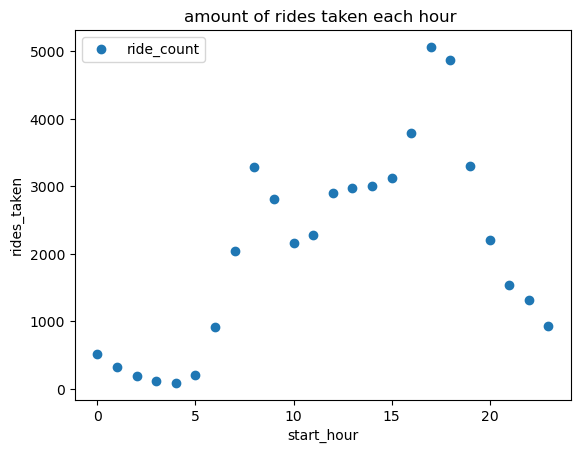

In [54]:
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken each hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

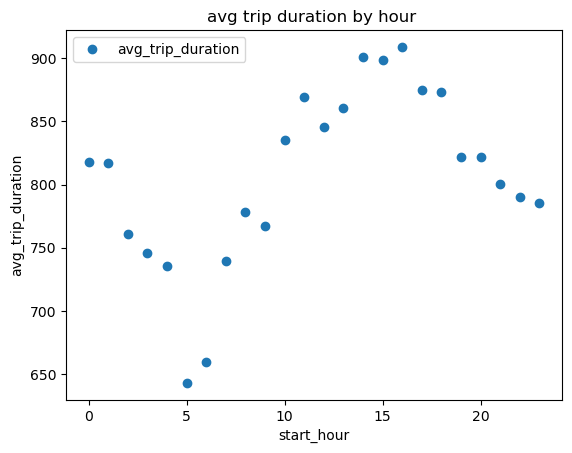

In [55]:
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

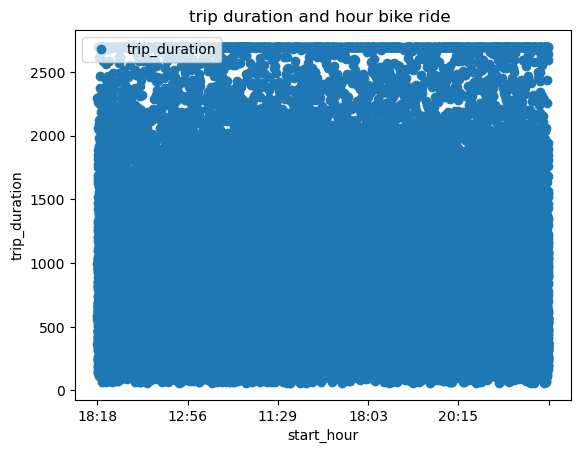

In [57]:
cb_df.plot(x = 'start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

##### Rides tend to be longer during the busier hours when rides occur.

### Use IQR method to look for outliers

In [65]:
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [66]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [67]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [68]:
outliers

,start_hour,ride_count,avg_trip_duration


In [69]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [70]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [71]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [72]:
outliers_1

,start_hour,ride_count,avg_trip_duration


In [73]:
# Check for outliers in cb_df

q1=cb_df['trip_duration'].quantile(0.25)#first Quartile
q3=cb_df['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [74]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [75]:
outliers_2 = cb_df[(cb_df['trip_duration'] < lower_bound) | (cb_df['trip_duration'] > upper_bound)]

In [76]:
outliers_2

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date,end_date
4,4,VGBsb5,18024,Sat,18,18:08,18:46,2296,521,8 Ave & W 31 St,...,40.743943,-73.979661,Non-Subscriber,1978.0,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314",Over 20 min,2013-09-07,2013-09-07
52,52,pTMLPi,15336,Sat,18,18:40,19:29,2697,384,Fulton St & Waverly Ave,...,40.710446,-73.965251,Non-Subscriber,1978.0,0,"-73.9659641, 40.68317813","-73.96525063, 40.71044554",Over 20 min,2013-09-14,2013-09-14
63,63,Wj4Vjl,20352,Wed,17,17:11,17:49,2262,469,Broadway & W 53 St,...,40.696102,-73.967510,Subscriber,1979.0,2,"-73.98268129, 40.76344058","-73.96751037, 40.69610226",Over 20 min,2013-09-11,2013-09-11
120,120,QCRJ3f,16918,Mon,18,18:24,19:28,2697,160,E 37 St & Lexington Ave,...,40.729538,-73.984267,Non-Subscriber,1978.0,0,"-73.978311, 40.748238","-73.98426726, 40.72953837",Over 20 min,2013-09-30,2013-09-30
143,143,NltTQm,17737,Mon,15,15:51,16:58,2697,217,Old Fulton St,...,40.710446,-73.965251,Non-Subscriber,1978.0,0,"-73.99383605, 40.70277159","-73.96525063, 40.71044554",Over 20 min,2013-09-09,2013-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49865,49893,u1yEkP,18054,Mon,16,16:13,17:13,2697,493,W 45 St & 6 Ave,...,40.744219,-73.971212,Subscriber,1968.0,1,"-73.98291153, 40.7568001","-73.97121214, 40.744219",Over 20 min,2013-09-09,2013-09-09
49921,49949,NR5zjV,17769,Mon,17,17:13,17:56,2592,534,Water - Whitehall Plaza,...,40.687979,-73.978474,Non-Subscriber,1978.0,0,"-74.0127234, 40.70255065","-73.978474, 40.687979",Over 20 min,2013-09-23,2013-09-23
49935,49963,ju0sOp,18471,Fri,15,15:55,16:40,2642,147,Greenwich St & Warren St,...,40.737050,-73.990093,Non-Subscriber,1978.0,0,"-74.01121978, 40.71542197","-73.99009296, 40.73704984",Over 20 min,2013-09-06,2013-09-06
49967,49995,Fb2bmC,17988,Sat,18,18:39,20:08,2697,479,9 Ave & W 45 St,...,40.760301,-73.998842,Non-Subscriber,1978.0,0,"-73.9912551, 40.76019252","-73.99884222, 40.76030096",Over 20 min,2013-09-21,2013-09-21


In [78]:
outliers_2.shape

(2060, 24)

In [79]:
cb_df.shape

(49972, 24)

In [83]:
# Remove outliers

filtered_cb = cb_df[(cb_df['trip_duration'] >= lower_bound) & (cb_df['trip_duration'] <= upper_bound)]

In [84]:
filtered_cb.shape

(47912, 24)

### Reshape variables into NumPy arrays and place them into separate objects

In [90]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [91]:
X

array([[ 522],
       [ 330],
       [ 194],
       [ 120],
       [  89],
       [ 208],
       [ 911],
       [2037],
       [3283],
       [2811],
       [2166],
       [2272],
       [2897],
       [2977],
       [3002],
       [3129],
       [3790],
       [5066],
       [4869],
       [3302],
       [2207],
       [1536],
       [1322],
       [ 932]], dtype=int64)

In [93]:
y

array([[818.13984674],
       [817.13636364],
       [760.98969072],
       [745.95833333],
       [735.66292135],
       [642.83653846],
       [659.23271131],
       [739.27098675],
       [777.95887907],
       [767.06581288],
       [835.46952909],
       [869.1852993 ],
       [845.4708319 ],
       [860.81021162],
       [900.86409061],
       [898.64653244],
       [909.18707124],
       [874.6125148 ],
       [873.08112549],
       [821.4954573 ],
       [821.52333484],
       [800.77539062],
       [790.21860817],
       [785.37339056]])

In [94]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
# Create a regression object.

regression = LinearRegression() 

In [96]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [97]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

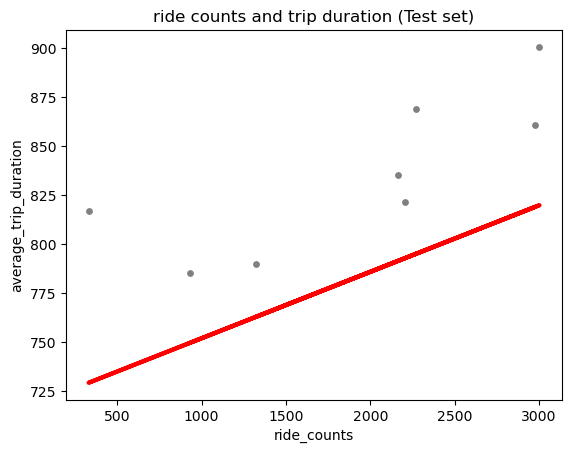

In [98]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

##### The regression line has positive regression. Meaning that more rides that occur, the longer the average rides are.
##### The positive slope line isn't close to the plots

In [99]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [100]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0339251]]
Mean squared error:  3270.456555814094
R2 score:  -1.3482087607924238


In [101]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,869.185299,795.266107
1,835.469529,791.670046
2,790.218608,763.037259
3,900.864091,820.031431
4,821.523335,793.060975
5,817.136364,729.383558
6,860.810212,819.183304
7,785.373391,749.806470


##### This model did not perform well on the test set. Comparing the predicted to the main dataframe.
##### A bias could be towards incorrectly recorded information, like inproper trip duration.
##### I feel for the linear regression to have 2 numeric variables and have a relationship would be tough. The data set seems to be more categorical.

In [102]:
# Save cb_df csv

cb_df.to_csv(os.path.join(path, 'CitiBike Project', 'Data', 'citibike_3.csv'))

### Running the IQR method again to check for changes

In [104]:
hourly_aggregated_filtered = filtered_cb.groupby('start_hour').agg({
    'start_date': 'count',      # Count of rides
    'trip_duration': 'mean'     # Average trip duration
}).reset_index()

In [105]:
hourly_aggregated_filtered

,start_hour,start_date,trip_duration
0,0,503,753.238569
1,1,316,738.303797
2,2,187,695.037433
3,3,117,696.025641
4,4,85,650.341176
5,5,206,624.441748
6,6,893,620.165733
7,7,1988,696.299296
8,8,3200,733.870000
9,9,2711,701.950572


In [106]:
hourly_aggregated_filtered.rename(columns={'start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

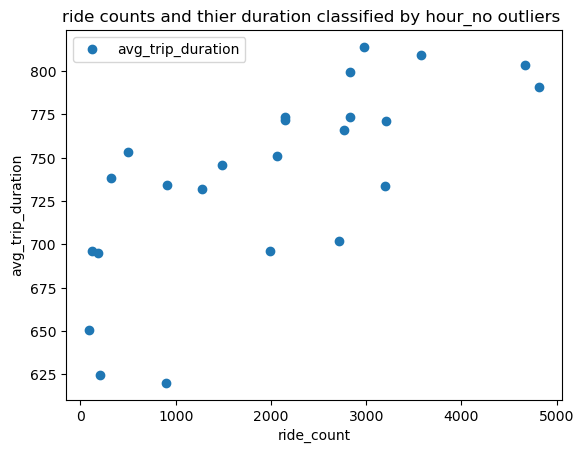

In [107]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [108]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [109]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [110]:
# Create a regression object.

regression = LinearRegression() 

In [111]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [112]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

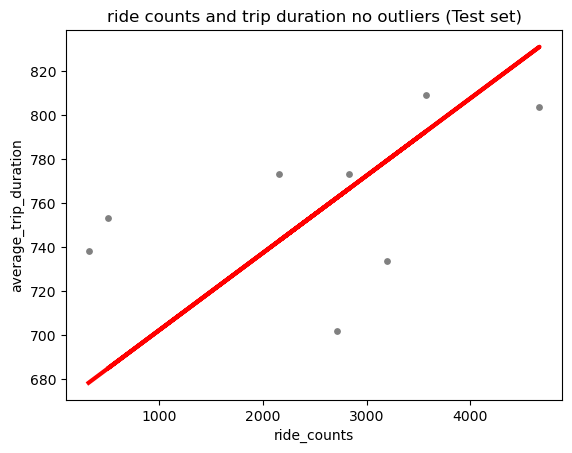

In [113]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

##### Still shows a positive regression.

In [114]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [115]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03508136]]
Mean squared error:  1999.2979251867418
R2 score:  -0.7340247987229818


In [118]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,733.870000,779.578740
1,809.003639,792.629005
2,753.238569,684.964319
3,803.633755,831.113254
4,773.264063,742.778396
5,701.950572,762.423956
6,773.387633,766.598637
7,738.303797,678.404105


##### No sigificant difference with outliers removed.

In [119]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,503,753.238569
1,1,316,738.303797
2,2,187,695.037433
3,3,117,696.025641
4,4,85,650.341176


In [120]:
cb_df.head()

,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,end_time,trip_duration,start_station_id,start_station_name,...,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date,end_date
0,0,LnQzQk,16013,Mon,18,18:18,18:35,993,523,W 38 St & 8 Ave,...,40.742388,-73.997262,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min,2013-09-09,2013-09-09
1,1,IL9boN,15230,Thu,18,18:38,18:48,581,257,Lispenard St & Broadway,...,40.728419,-73.987140,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min,2013-09-12,2013-09-12
2,2,46clGB,17942,Wed,19,19:44,19:50,361,479,9 Ave & W 45 St,...,40.768254,-73.988639,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min,2013-09-18,2013-09-18
3,3,v7vdFt,19683,Sat,11,11:54,12:03,561,527,E 33 St & 1 Ave,...,40.756014,-73.967416,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min,2013-09-28,2013-09-28
4,4,VGBsb5,18024,Sat,18,18:08,18:46,2296,521,8 Ave & W 31 St,...,40.743943,-73.979661,Non-Subscriber,1978.0,0,"-73.99481051, 40.75044999","-73.97966069, 40.74394314",Over 20 min,2013-09-07,2013-09-07


In [123]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               49972 non-null  int64         
 1   trip_id                  49972 non-null  object        
 2   bike_id                  49972 non-null  int64         
 3   day_of_week              49972 non-null  object        
 4   start_hour               49972 non-null  int64         
 5   start_time               49972 non-null  object        
 6   end_time                 49972 non-null  object        
 7   trip_duration            49972 non-null  int64         
 8   start_station_id         49972 non-null  int64         
 9   start_station_name       49972 non-null  object        
 10  start_station_latitude   49972 non-null  float64       
 11  start_station_longitude  49972 non-null  float64       
 12  end_station_id           49972 n

### Cleaning unneeded columns from cb_df

In [121]:
cb_clean=cb_df[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_station_coords', 'end_station_coords',
       'trip_length', 'start_date', 'start_time','end_date','end_time']]

In [122]:
cb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              49972 non-null  object        
 1   start_hour               49972 non-null  int64         
 2   start_station_id         49972 non-null  int64         
 3   start_station_name       49972 non-null  object        
 4   start_station_latitude   49972 non-null  float64       
 5   start_station_longitude  49972 non-null  float64       
 6   end_station_id           49972 non-null  int64         
 7   end_station_name         49972 non-null  object        
 8   end_station_latitude     49972 non-null  float64       
 9   end_station_longitude    49972 non-null  float64       
 10  trip_duration            49972 non-null  int64         
 11  subscriber               49972 non-null  object        
 12  birth_year               49972 n

In [124]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,503,753.238569
1,1,316,738.303797
2,2,187,695.037433
3,3,117,696.025641
4,4,85,650.341176


In [126]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [127]:
hourly_aggregated_filtered

,start_hour,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,503,753.238569,12.553976
1,1,316,738.303797,12.305063
2,2,187,695.037433,11.583957
3,3,117,696.025641,11.600427
4,4,85,650.341176,10.839020
5,5,206,624.441748,10.407362
6,6,893,620.165733,10.336096
7,7,1988,696.299296,11.604988
8,8,3200,733.870000,12.231167
9,9,2711,701.950572,11.699176


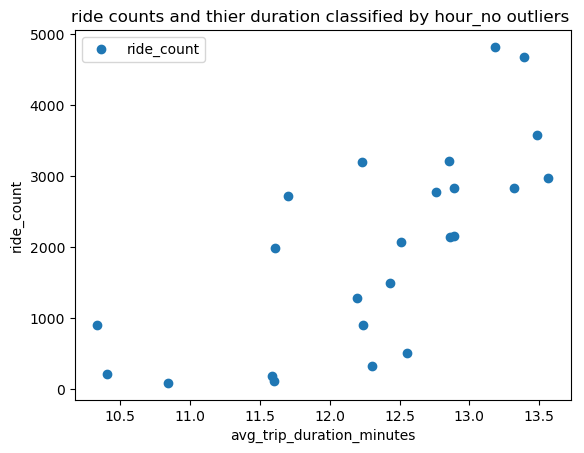

In [128]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [129]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [130]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

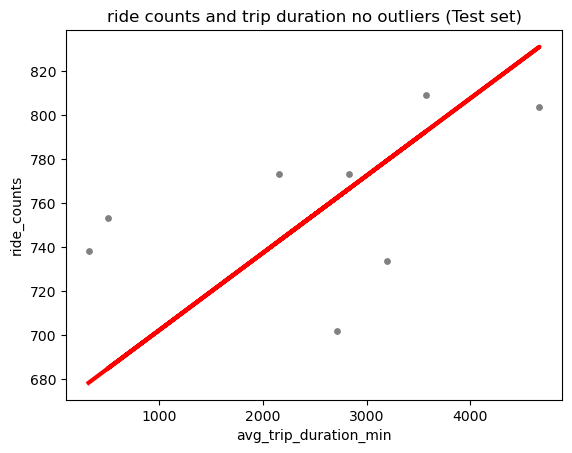

In [131]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [132]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score.

In [133]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03508136]]
Mean squared error:  1999.2979251867418
R2 score:  -0.7340247987229818


In [135]:
ride_count.head()

,Unnamed: 0,trip_id,bike_id,start_time,end_time,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,LnQzQk,16013,18:18,18:35,993,523,W 38 St & 8 Ave,40.754666,-73.991382,...,0,0,0,0,1,0,0,0,0,0
1,1,IL9boN,15230,18:38,18:48,581,257,Lispenard St & Broadway,40.719392,-74.002472,...,0,0,0,0,1,0,0,0,0,0
2,2,46clGB,17942,19:44,19:50,361,479,9 Ave & W 45 St,40.760193,-73.991255,...,0,0,0,0,0,1,0,0,0,0
3,3,v7vdFt,19683,11:54,12:03,561,527,E 33 St & 1 Ave,40.743156,-73.974347,...,0,0,0,0,0,0,0,0,0,0
4,4,VGBsb5,18024,18:08,18:46,2296,521,8 Ave & W 31 St,40.750450,-73.994811,...,0,0,0,0,1,0,0,0,0,0


In [136]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [137]:
# Import statsmodels.api

import statsmodels.api as sm

In [138]:
X = sm.add_constant(X)

In [139]:
y = hourly_aggregated_filtered['ride_count']

In [140]:
model = sm.OLS(y, X).fit()

In [141]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     12.70
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000243
Time:                        21:49:08   Log-Likelihood:                -198.11
No. Observations:                  24   AIC:                             402.2
Df Residuals:                      21   BIC:                             405.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9848.2304   3165.87

In [142]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']

In [143]:
X = sm.add_constant(X)

In [144]:
model_count = sm.OLS(y_count, X).fit()

In [145]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()

In [146]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     9.558
Date:                Fri, 17 Nov 2023   Prob (F-statistic):            0.00533
Time:                        21:50:09   Log-Likelihood:                -203.29
No. Observations:                  24   AIC:                             410.6
Df Residuals:                      22   BIC:                             412.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        731.8133    4

In [147]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)

In [148]:
y = hourly_aggregated_filtered['ride_count']

In [149]:
model = sm.OLS(y, X).fit()

In [150]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     12.70
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000243
Time:                        21:50:39   Log-Likelihood:                -198.11
No. Observations:                  24   AIC:                             402.2
Df Residuals:                      21   BIC:                             405.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9848.2304   3165.87

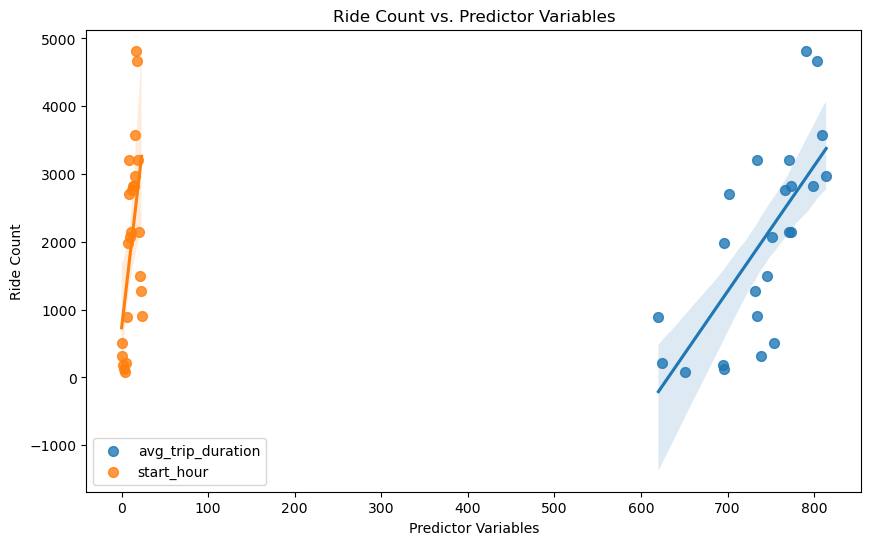

In [151]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Count vs. Predictor Variables')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [152]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [153]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [154]:
model = sm.OLS(y, X).fit()

In [155]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.77
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000235
Time:                        21:51:40   Log-Likelihood:                -120.03
No. Observations:                  24   AIC:                             246.1
Df Residuals:                      21   BIC:                             249.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        673.4929     16.004     42.083      0.0

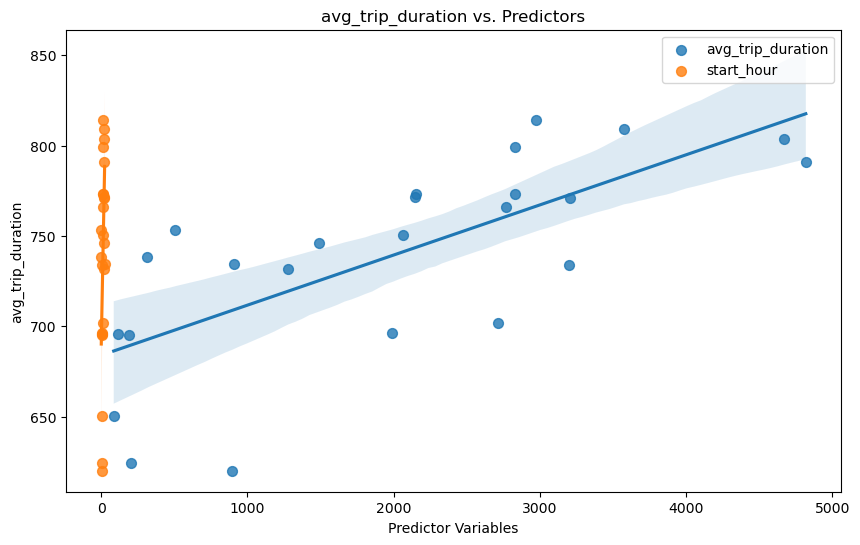

In [156]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [157]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values


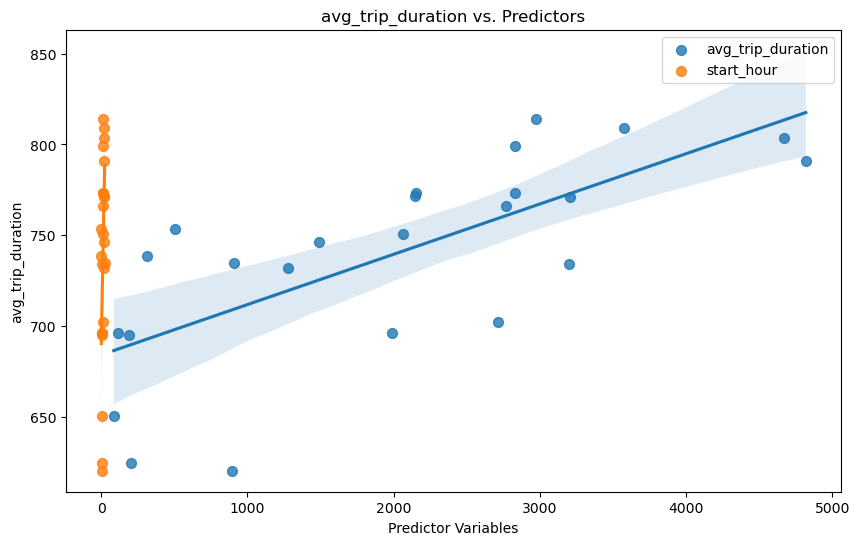

In [158]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [159]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [161]:
# Create a regression object.

regression = LinearRegression() 

In [162]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [163]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [164]:
# Define the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [166]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [167]:
y

0     753.238569
1     738.303797
2     695.037433
3     696.025641
4     650.341176
5     624.441748
6     620.165733
7     696.299296
8     733.870000
9     701.950572
10    750.798742
11    773.264063
12    765.871795
13    773.387633
14    799.202263
15    813.964382
16    809.003639
17    790.830670
18    803.633755
19    771.198940
20    771.592817
21    746.044997
22    731.713057
23    734.440397
Name: avg_trip_duration, dtype: float64

In [168]:
X

,ride_count,start_hour
0,503,0
1,316,1
2,187,2
3,117,3
4,85,4
5,206,5
6,893,6
7,1988,7
8,3200,8
9,2711,9


In [169]:
cb_clean.to_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_4.csv'))

In [170]:
filter_clean_cb = filtered_cb[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_station_coords', 'end_station_coords',
       'trip_length', 'start_date', 'start_time','end_date','end_time']]

In [172]:
filter_clean_cb.to_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_filtered_clean.csv'))